# 데이터 확인

In [1]:
# 데이터 로드
import pandas as pd
train = pd.read_table("data/ratings_train.txt")
test = pd.read_table("data/ratings_test.txt")

In [2]:
# 데이터 개수 확인
print(len(train), len(test))

# 데이터 구성 확인
train

150000 50000


id                                           document  label
0        9976970                                아 더빙.. 진짜 짜증나네요 목소리      0
1        3819312                  흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나      1
2       10265843                                  너무재밓었다그래서보는것을추천한다      0
3        9045019                      교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정      0
4        6483659  사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...      1
...          ...                                                ...    ...
149995   6222902                                인간이 문제지.. 소는 뭔죄인가..      0
149996   8549745                                      평점이 너무 낮아서...      1
149997   9311800                    이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?      0
149998   2376369                        청춘 영화의 최고봉.방황과 우울했던 날들의 자화상      1
149999   9619869                           한국 영화 최초로 수간하는 내용이 담긴 영화      0

[150000 rows x 3 columns]

# 데이터 정제

In [3]:
# 결측치(nan) 확인 == nan의 개수 있는지 확인
print(train.isnull().sum())
print("\n")
print(test.isnull().sum())

id          0
document    5
label       0
dtype: int64


id          0
document    3
label       0
dtype: int64


In [4]:
# 결측치 제거
train = train.dropna()
test = test.dropna()

In [5]:
# 결측치(nan) 확인 == nan의 개수 확인
print(train.isnull().sum())
print("\n")
print(test.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149995 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        149995 non-null  int64 
 1   document  149995 non-null  object
 2   label     149995 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.6+ MB


<class 'pandas.core.frame.DataFrame'>
Int64Index: 49997 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        49997 non-null  int64 
 1   document  49997 non-null  object
 2   label     49997 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.5+ MB


(None, None, None)

In [7]:
# 한글 외에 다른 요소들 없애기
train["document"] = train["document"].str.replace(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]', "")
test["document"] = test["document"].str.replace(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]', "")

C:\Users\hsj\anaconda3\envs\test\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# 전처리를 진행하면서 공백이 생겼다면 이를 nan으로 설정하고 다시 결측치를 제거하는 작업을 해줍니다.
import numpy as np

train['document'].replace('', np.nan, inplace=True)
test['document'].replace('', np.nan, inplace=True)

print(train.isnull().sum()) # 다시 한번 결측치가 있는지 확인
print(test.isnull().sum()) # 다시 한번 결측치가 있는지 확인

In [ ]:
# 결측치 제거
train = train.dropna()
test = test.dropna()

# 데이터 전처리

In [ ]:
from tqdm import tqdm # for문의 실행되는 정도를 확인할 수 있다.
from konlpy.tag import Kkma # 형태소 분석을 위함

kkma = Kkma()

## 형태소 단위로 자르기

In [13]:
# a = []
# for i,value in tqdm(enumerate(train["document"])):
#     try:
#         a.append(str(" ".join([k[0] for k in kkma.pos(value)])))
#     except:
#         a.append("")

In [14]:
# b = []
# for i,value in tqdm(enumerate(test["document"])):
#     try:
#         b.append(str(" ".join([k[0] for k in kkma.pos(value)])))
#     except:
#         b.append("")

140

## 음절 단위로 자르기

In [16]:
c = []
for i,value in tqdm(enumerate(train["document"])):
    try:
        c.append(str(" ".join([j for i in value.split() for j in i])))
    except:
        c.append("")

149186it [59:58, 41.46it/s] 


In [17]:
d = []
for i,value in tqdm(enumerate(test["document"])):
    try:
        d.append(str(" ".join([j for i in value.split() for j in i])))
    except:
        d.append("")

49726it [34:26, 24.06it/s] 


## train, test 데이터에 열 추가

In [53]:
train["document_morpheme"] = a
test["document_morpheme"] = b
train["document_syllable"] = c
test["document_syllable"] = d

In [104]:
train.head()

id                                           document  label  \
0   9976970                                  아 더빙 진짜 짜증나네요 목소리      0   
1   3819312                         흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나      1   
2  10265843                                  너무재밓었다그래서보는것을추천한다      0   
3   9045019                          교도소 이야기구먼 솔직히 재미는 없다평점 조정      0   
4   6483659  사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던...      1   

                                   document_morpheme  \
0                               아 아 더빙 진짜 짜증나 네요 목소리   
1               흠 포스터 보고 초 딩 영화 줄 오버 연기 조차 가볍 지 않 구나   
2                   너무 재 밓 어 었 다 그래서 보 는 것 을 추천 하 ㄴ다   
3                   교도소 이야기 구 멀 ㄴ 솔직히 재미 는 없 다 평점 조정   
4  사이몬페그 의 익살 스럽 ㄴ 연기 가 돋보이 었 더 ㄴ 영화 스파이 더 맨 에서 늙...   

                                   document_syllable  
0                          아 더 빙 진 짜 짜 증 나 네 요 목 소 리  
1      흠 포 스 터 보 고 초 딩 영 화 줄 오 버 연 기 조 차 가 볍 지 않 구 나  
2                  너 무 재 밓 었 다 그 래 서 보 는 것 을 추 천 한 다  
3            교 도 소 이 야 기 구 먼 솔 직 히 재 미 는 없 다 평 점 조 정  
4  사 이 몬 페 그 의 익 살 스 런 연 기 가 돋 보 였 던 영 화 스 파 이 더 ...

# 데이터 다시 정제하기

In [ ]:
# 데이터가 비어있으면 해당 행을 모두 제거해줍니다.

train = train[train["document_morpheme"]!= ""]
test = test[test["document_morpheme"]!= ""]

train = train[train["document_syllable"]!= ""]
test = test[test["document_syllable"]!= ""]

# 만들어진 train, test 객체를 저장

In [418]:
# 만들어진 train, test데이터 객체 저장 // 추 후에 load해서 빠르게 사용하기 위함

import pickle

In [ ]:
# with open('preprocess_형태소_음절.p', 'wb') as file: # 파일을 바이너리 쓰기 모드(wb)로 열기
#     pickle.dump(train, file)
#     pickle.dump(test, file)

In [193]:
with open('preprocess_형태소_음절.p', 'rb') as file: # 파일을 바이너리 읽기 모드(rb)로 열기
    train = pickle.load(file)
    test = pickle.load(file)

In [ ]:
len(train), len(test)

# 정수 인코딩

In [8]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()

tokenizer.fit_on_texts(train["document_morpheme"])

# 벡터화
x_train = tokenizer.texts_to_sequences(train["document_morpheme"])
x_test = tokenizer.texts_to_sequences(test["document_morpheme"])

# 총 단어 수
total_word = len(tokenizer.word_index)

# 단어 집합의 크기
vocab_size = total_word+1

#
import numpy as np
y_train = np.array(train["label"])
y_test = np.array(test["label"])

In [18]:
# 데이터의 최대 길이 확인

# train + test 데이터 합치기
all_data = pd.concat([train, test], axis = 0)

max_len = 0
for i in all_data["document"]:
    if max_len <= len(i):
        max_len = len(i)
        
print(max_len)

In [19]:
# 패딩을 통해 길이를 맞춰줍니다.
from keras.preprocessing.sequence import pad_sequences

x_train = pad_sequences(x_train, maxlen = max_len)
x_test = pad_sequences(x_test, maxlen = max_len)

In [20]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape, max_len, vocab_size

((149186, 140), (49726, 140), (149186,), (49726,), 140, 39682)

# 모델1 - 기본 dense layer

In [91]:
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential

### 모델 구축

In [85]:
model__ = Sequential()
model__.add(Dense(64, activation='relu', input_shape=(140,)))
model__.add(Dropout(0.5))
model__.add(Dense(32, activation='relu'))
model__.add(Dense(1, activation='sigmoid'))

model__.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [86]:
model__.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 64)                9024      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 33        
Total params: 11,137
Trainable params: 11,137
Non-trainable params: 0
_________________________________________________________________


### 모델 학습

In [ ]:
model__.fit(x_train, y_train, epochs = 10, batch_size = 64, validation_split = 0.2)

### 그래프

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# epoch마다 정확도와 validation 정확도의 수치를 그래프로 표현해봅니다.
plt.title("Accuracy")

plt.plot(history.history["acc"], color="g", label="train")
plt.plot(history.history["val_acc"], color="r", label="validation")

plt.gca().invert_yaxis() # y축 반대로 뒤집기
plt.show()

In [ ]:
plt.title("Loss")

plt.plot(history.history["loss"], color="g", label="train")
plt.plot(history.history["val_loss"], color="r", label="validation")

plt.show()

### 모델 2 - lstm

In [ ]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential

In [84]:
model = Sequential()

model.add(Embedding(vocab_size, 100))
model.add(LSTM(140))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [86]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 100)         3968200   
_________________________________________________________________
lstm (LSTM)                  (None, 140)               134960    
_________________________________________________________________
dense (Dense)                (None, 1)                 141       
Total params: 4,103,301
Trainable params: 4,103,301
Non-trainable params: 0
_________________________________________________________________


In [87]:
history = model.fit(x_train, y_train, epochs=15, batch_size=64, validation_split=0.2)


Train on 118990 samples, validate on 29748 samples
Epoch 1/15
118990/118990 [==============================] - 292s 2ms/sample - loss: 0.3923 - acc: 0.8222 - val_loss: 0.3586 - val_acc: 0.8406
Epoch 2/15
118990/118990 [==============================] - 290s 2ms/sample - loss: 0.3243 - acc: 0.8596 - val_loss: 0.3270 - val_acc: 0.8568
Epoch 3/15
118990/118990 [==============================] - 286s 2ms/sample - loss: 0.2968 - acc: 0.8751 - val_loss: 0.3150 - val_acc: 0.8625
Epoch 4/15
118990/118990 [==============================] - 288s 2ms/sample - loss: 0.2745 - acc: 0.8867 - val_loss: 0.3088 - val_acc: 0.8675
Epoch 5/15
118990/118990 [==============================] - 290s 2ms/sample - loss: 0.2548 - acc: 0.8982 - val_loss: 0.3103 - val_acc: 0.8664
Epoch 6/15
118990/118990 [==============================] - 292s 2ms/sample - loss: 0.2374 - acc: 0.9062 - val_loss: 0.3141 - val_acc: 0.8684
Epoch 7/15
118990/118990 [==============================] - 283s 2ms/sample - loss: 0.2206 - acc:

In [99]:
print(history.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


### 그래프

In [108]:
import matplotlib.pyplot as plt

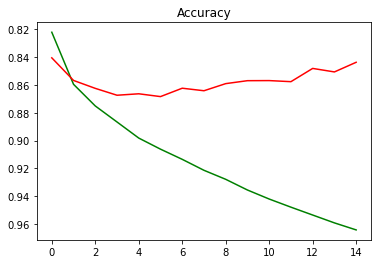

In [100]:
# epoch마다 정확도와 validation 정확도의 수치를 그래프로 표현해봅니다.
plt.title("Accuracy")

plt.plot(history.history["acc"], color="g", label="train")
plt.plot(history.history["val_acc"], color="r", label="validation")

plt.gca().invert_yaxis() # y축 반대로 뒤집기
plt.show()

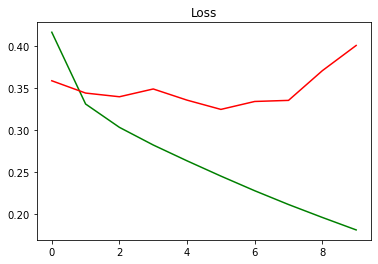

In [110]:
plt.title("Loss")

plt.plot(history.history["loss"], color="g", label="train")
plt.plot(history.history["val_loss"], color="r", label="validation")

plt.show()

# 모델 3 - cnn + bidirectional_lstm

In [88]:
from tensorflow.keras.layers import Embedding, Dense, Dropout, Conv1D, \
                            MaxPooling1D, Bidirectional, LSTM, Activation

from tensorflow.keras.models import Sequential

### 모델 구축

In [92]:
model_ = Sequential()

model_.add(Embedding(vocab_size,100))
model_.add(Dropout(0.4))
model_.add(Conv1D(300, 3, padding= 'same', activation='relu', strides=1))
model_.add(MaxPooling1D(pool_size=4))
model_.add(Bidirectional(LSTM(100, activation = "relu")))
model_.add(Dropout(0.5))
model_.add(Dense(32, activation="relu"))
model_.add(Dense(1))
model_.add(Activation('sigmoid'))

model_.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [93]:
model_.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 100)         3968200   
_________________________________________________________________
dropout_4 (Dropout)          (None, None, 100)         0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, None, 300)         90300     
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, None, 300)         0         
_________________________________________________________________
bidirectional (Bidirectional (None, 200)               320800    
_________________________________________________________________
dropout_5 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 32)               

### 모델 학습

In [94]:
history_ = model_.fit(x_train, y_train, epochs=15, batch_size=64, 
                      validation_split=0.2)


Train on 119348 samples, validate on 29838 samples
Epoch 1/15
119348/119348 [==============================] - 435s 4ms/sample - loss: 0.3910 - accuracy: 0.8198 - val_loss: 0.3317 - val_accuracy: 0.8538
Epoch 2/15
119348/119348 [==============================] - 447s 4ms/sample - loss: 0.3000 - accuracy: 0.8741 - val_loss: 0.3336 - val_accuracy: 0.8552
Epoch 3/15
119348/119348 [==============================] - 460s 4ms/sample - loss: 0.2517 - accuracy: 0.8981 - val_loss: 0.3470 - val_accuracy: 0.8570
Epoch 4/15
119348/119348 [==============================] - 441s 4ms/sample - loss: 0.2147 - accuracy: 0.9150 - val_loss: 0.3568 - val_accuracy: 0.8536
Epoch 5/15
119348/119348 [==============================] - 422s 4ms/sample - loss: 0.1865 - accuracy: 0.9267 - val_loss: 0.4191 - val_accuracy: 0.8523
Epoch 6/15
119348/119348 [==============================] - 423s 4ms/sample - loss: 0.1656 - accuracy: 0.9360 - val_loss: 0.4300 - val_accuracy: 0.8505
Epoch 7/15
119348/119348 [===========

### 그래프

In [111]:
print(history_.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


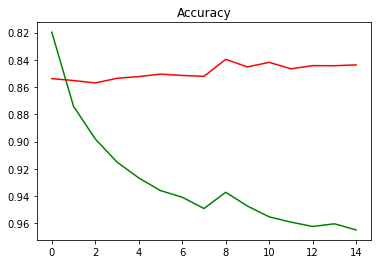

In [113]:
# epoch마다 정확도와 validation 정확도의 수치를 그래프로 표현해봅니다.
plt.title("Accuracy")

plt.plot(history_.history["accuracy"], color="g", label="train")
plt.plot(history_.history["val_accuracy"], color="r", label="validation")

plt.gca().invert_yaxis() # y축 반대로 뒤집기
plt.show()

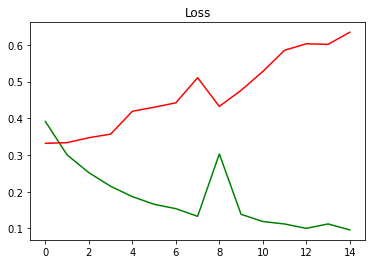

In [114]:
plt.title("Loss")

plt.plot(history_.history["loss"], color="g", label="train")
plt.plot(history_.history["val_loss"], color="r", label="validation")

plt.show()

In [115]:
# loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % (model_.evaluate(x_test, y_test)[1]))

49726/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================


 테스트 정확도: 0.8428


In [44]:
def sentiment_predict(new_sentence):
    new_sentence = kkma.morphs(new_sentence) # 토큰화
#     new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
    encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
    pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
    score = float(model.predict(pad_new)) # 예측
    if(score > 0.5):
        print("{:.2f}% 확률로 긍정 리뷰입니다.\n".format(score * 100))
    else:
        print("{:.2f}% 확률로 부정 리뷰입니다.\n".format((1 - score) * 100))

In [45]:

sentiment_predict('이 영화 개꿀잼 ㅋㅋㅋ')

NameError: name 'kkma' is not defined

In [87]:
history__ = model_.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)


Train on 119348 samples, validate on 29838 samples
Epoch 1/15
119348/119348 [==============================] - 179s 1ms/sample - loss: 0.0623 - accuracy: 0.9763 - val_loss: 0.6480 - val_accuracy: 0.8426
Epoch 2/15
119348/119348 [==============================] - 179s 1ms/sample - loss: 0.0611 - accuracy: 0.9774 - val_loss: 0.6627 - val_accuracy: 0.8425
Epoch 3/15
119348/119348 [==============================] - 179s 2ms/sample - loss: 0.0598 - accuracy: 0.9773 - val_loss: 0.6670 - val_accuracy: 0.8438
Epoch 4/15
119348/119348 [==============================] - 180s 2ms/sample - loss: 0.0598 - accuracy: 0.9773 - val_loss: 0.6812 - val_accuracy: 0.8410
Epoch 5/15
119348/119348 [==============================] - 184s 2ms/sample - loss: 0.0594 - accuracy: 0.9774 - val_loss: 0.7392 - val_accuracy: 0.8427
Epoch 6/15
119348/119348 [==============================] - 179s 2ms/sample - loss: 0.0586 - accuracy: 0.9777 - val_loss: 0.7106 - val_accuracy: 0.8421
Epoch 7/15
119348/119348 [===========

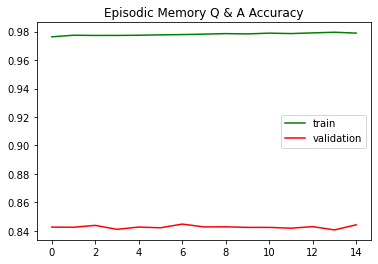

In [88]:
# 정확도와 손실도 를 그림으로 나타내줘 epoch마다 정확도와 validation 정확도의 수치를 눈으로 확인하게끔 해줍니다.
plt.title("Episodic Memory Q & A Accuracy")
# plt.plot(history.history["acc"], color="g", label="train")
plt.plot(history__.history["accuracy"], color="g", label="train")
# plt.plot(history.history["val_acc"], color="r", label="validation")
plt.plot(history__.history["val_accuracy"], color="r", label="validation")
plt.legend(loc="best")

plt.show()

In [89]:
# loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도:", model__.evaluate(x_test, y_test))

49726/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================


 테스트 정확도: [216.56771357711648, 0.5027551]


In [372]:
# 정수 인코딩
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()


tokenizer.fit_on_texts(train["document_first"])


x_train = tokenizer.texts_to_sequences(train["document_first"])
x_test = tokenizer.texts_to_sequences(test["document_first"])


# 총 단어 수
total_word = len(tokenizer.word_index)

# 단어 집합의 크기
vocab_size = total_word+1

y_train = np.array(train["label"])
y_test = np.array(test["label"])

# 패딩을 통해 길이를 맞춰줍니다.
from keras.preprocessing.sequence import pad_sequences

x_train = pad_sequences(x_train, maxlen = max_len)
x_test = pad_sequences(x_test, maxlen = max_len)

In [100]:
model = Sequential()

model.add(Embedding(vocab_size, 100))
model.add(LSTM(140))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [101]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 100)         3968200   
_________________________________________________________________
lstm_3 (LSTM)                (None, 140)               134960    
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 141       
Total params: 4,103,301
Trainable params: 4,103,301
Non-trainable params: 0
_________________________________________________________________


In [103]:
history = model.fit(x_train, y_train, epochs=10, batch_size=256, validation_split=0.2)


Train on 119348 samples, validate on 29838 samples
Epoch 1/10
119348/119348 [==============================] - 760s 6ms/sample - loss: 0.4160 - acc: 0.8168 - val_loss: 0.3583 - val_acc: 0.8442
Epoch 2/10
119348/119348 [==============================] - 756s 6ms/sample - loss: 0.3307 - acc: 0.8578 - val_loss: 0.3437 - val_acc: 0.8522
Epoch 3/10
119348/119348 [==============================] - 749s 6ms/sample - loss: 0.3030 - acc: 0.8717 - val_loss: 0.3393 - val_acc: 0.8516
Epoch 4/10
119348/119348 [==============================] - 722s 6ms/sample - loss: 0.2820 - acc: 0.8824 - val_loss: 0.3486 - val_acc: 0.8527
Epoch 5/10
119348/119348 [==============================] - 725s 6ms/sample - loss: 0.2632 - acc: 0.8917 - val_loss: 0.3353 - val_acc: 0.8636
Epoch 6/10
119348/119348 [==============================] - 728s 6ms/sample - loss: 0.2451 - acc: 0.9011 - val_loss: 0.3243 - val_acc: 0.8613
Epoch 7/10
119348/119348 [==============================] - 737s 6ms/sample - loss: 0.2277 - acc:

In [ ]:
# 정확도와 손실도 를 그림으로 나타내줘 epoch마다 정확도와 validation 정확도의 수치를 눈으로 확인하게끔 해줍니다.
plt.title("Episodic Memory Q & A Accuracy")
# plt.plot(history.history["acc"], color="g", label="train")
plt.plot(history_.history["accuracy"], color="g", label="train")
# plt.plot(history.history["val_acc"], color="r", label="validation")
plt.plot(history_.history["val_accuracy"], color="r", label="validation")
plt.legend(loc="best")

plt.show()

In [383]:
# loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % (model.evaluate(x_test, y_test)))

49726/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

TypeError: must be real number, not list

In [379]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [119]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 100)         3968200   
_________________________________________________________________
lstm_3 (LSTM)                (None, 140)               134960    
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 141       
Total params: 4,103,301
Trainable params: 4,103,301
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model__.fit